In [23]:
from newsapi.newsapi_client import NewsApiClient
import random
import os
from dotenv import load_dotenv

load_dotenv()

True

In [24]:
from datetime import datetime, timedelta

prev_date = datetime.today() - timedelta(days=30)
next_date = datetime.today() - timedelta(days=0)

p_date = str(prev_date.year) + '-' + str(prev_date.month) + '-' + str(prev_date.day)
c_date = str(next_date.year) + '-' + str(next_date.month) + '-' + str(next_date.day)

if prev_date.month < 10:
    p_date = str(prev_date.year) + '-0' + str(prev_date.month) + '-' + str(prev_date.day)

if next_date.month < 10:
    c_date = str(next_date.year) + '-0' + str(next_date.month) + '-' + str(next_date.day)

print("p_date =", p_date)
print("c_date =", c_date)

print("Api Key =", os.environ["API_KEY"])

api_client = NewsApiClient(api_key=os.environ["API_KEY"])

def getNews(sourceId):
    newses = api_client.get_everything(
        sources=sourceId,
        domains='bbc.co.uk,techcrunch.com',
        from_param=p_date,
        to=c_date,
        language='en',
        sort_by='relevancy',
        page=2
    )

    newsData = []
    for news in newses['articles']:
        list = [random.randint(0, 1000), news['title'], news['content'], 'REAL']
        newsData.append(list)

    return newsData


p_date = 2025-06-16
c_date = 2025-07-16
Api Key = 6aac1c58a6b14155ba66bbef9c2f02a9


In [25]:
sources = api_client.get_sources()
sourceList = []

for source in sources['sources']:
    sourceList.append(source['id'])

del sourceList[10:]
print("NEWs Sources:", sourceList)

NEWs Sources: ['abc-news', 'abc-news-au', 'aftenposten', 'al-jazeera-english', 'ansa', 'argaam', 'ars-technica', 'ary-news', 'associated-press', 'australian-financial-review']


In [26]:
newsList = []
for sourceId in sourceList:
    newsData = getNews(sourceId)
    newsList = newsList + newsData

print('Total News: ', len(newsList))

Total News:  1000


In [27]:
import pandas as pd
df = pd.DataFrame.from_records(newsList)
df.columns = ['', 'title', 'text', 'label']
print(df.head)

<bound method NDFrame.head of                                                       title  \
0    706  Supreme Court upholds state's online age verif...   
1    448       WATCH: This 1-year-old is a TikTok sensation   
2     67    What Diddy prosecutors said in closing argument   
3    421  WATCH: Frightening malfunction at Beyoncé's 'C...   
4    786  WATCH: Fireworks warehouse catches fire and ex...   
..   ...                                                ...   
995  370                                  Russia bombs Kyiv   
996  445                               05/07/2025 04:01 GMT   
997  570                               04/07/2025 13:01 GMT   
998  478                               04/07/2025 23:01 GMT   
999  332                               06/07/2025 14:01 GMT   

                                                  text label  
0    The Supreme Court ruled Friday that a Texas la...  REAL  
1    <ul><li>Trump says he's 'terminating' all trad...  REAL  
2    "It's time to find 

In [28]:
# Add fake news dataset
train_data = pd.read_csv('news.csv')
train_data.columns = ['', 'title', 'text', 'label']

data = [train_data, df]
df = pd.concat(data)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

training_x, testing_x, training_y, testing_y = train_test_split(
    df['text'], df.label, test_size=0.3, random_state=7
)

print(training_x.shape)
print(testing_x.shape)

(5134,)
(2201,)


In [30]:
# Encoding or Feature Extraction (Selection)
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.7)
feature_train = count_vectorizer.fit_transform(training_x)
feature_test = count_vectorizer.transform(testing_x)

Accuracy:  0.9182189913675602


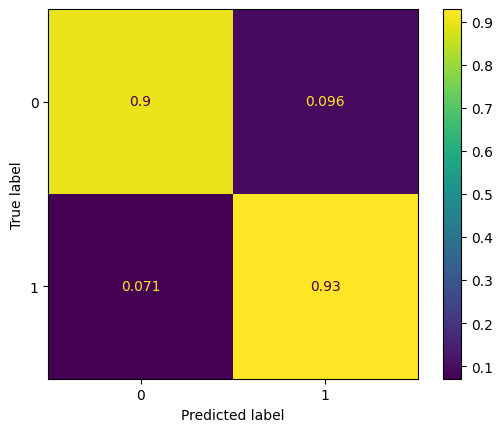

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(feature_train, training_y)
prediction = classifier.predict(feature_test)
score = accuracy_score(testing_y, prediction)

print("Accuracy: ", score)

cm = confusion_matrix(testing_y, prediction, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [32]:
# Load Test Data and Evaluate
test_data = pd.read_csv('test_data.csv')
test_labels = test_data.label
test_data.head()

test_data_feature = count_vectorizer.transform(test_data['text'])
prediction = classifier.predict(test_data_feature)
score = accuracy_score(test_labels, prediction)
print("Accuracy: ", score*100, "%")

Accuracy:  100.0 %
